In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris') 

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Exploration

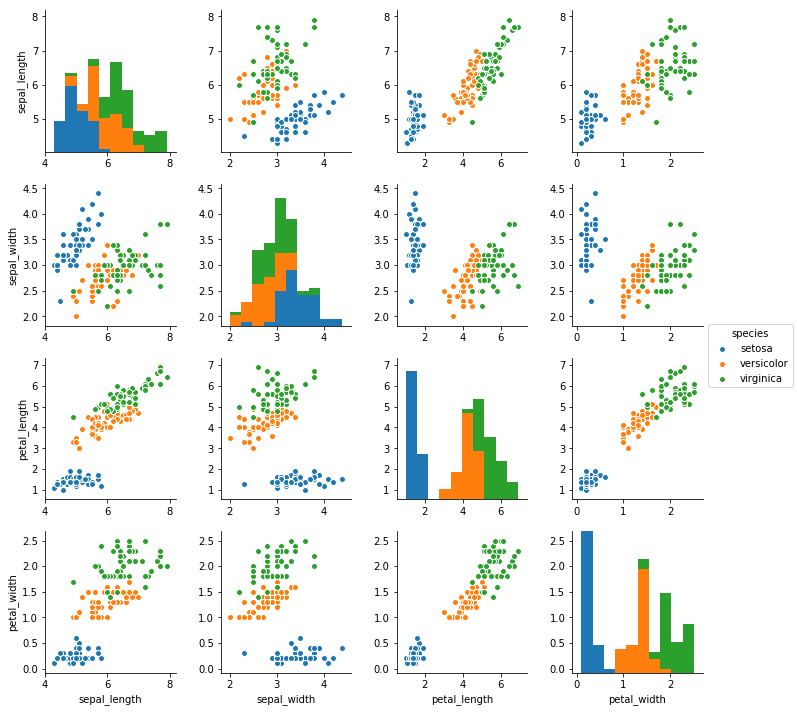

In [9]:
sns.pairplot(iris, hue="species")

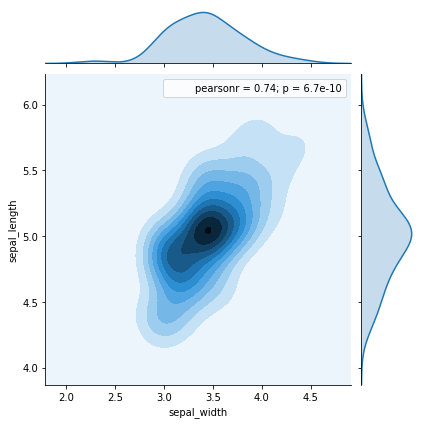

In [12]:
sns.jointplot(x="sepal_width", y="sepal_length", data=iris[iris.species == "setosa"], kind="kde")

# Training SVM Model

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop("species", axis=1), iris["species"], test_size=0.30)

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.86      1.00      0.92        12
  virginica       1.00      0.90      0.95        21

avg / total       0.96      0.96      0.96        45



# Try to Get Better Precision With Gridsearch

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9090909090909091, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7222222222222222, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7575757575757576, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. C=10, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.9090909090909091, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9722222222222222, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9393939393939394, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9722222222222222, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .......................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
grid_predictions = grid.predict(X_test)

In [34]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.92      1.00      0.96        12
  virginica       1.00      0.95      0.98        21

avg / total       0.98      0.98      0.98        45



#### Looks like we found a marginally better parameter for our SVM